<span style="color: blue;font-weight: bold; font-size: 40px;">Cornerstone Project: Fraud Dection Classification </span>

Fraud detection in the financial industry is a critical issue, as fraudulent activities can lead to significant financial losses and damage an institution's reputation. As financial transactions become more complex and fraud schemes more sophisticated, advanced detection methods are necessary. Fraud detection in banking transactions involves a set of processes and analyses that financial institutions use to prevent and identify unauthorised financial activity. This can include a wide range of illicit acts, such as identity theft, payment fraud, and account takeover, which can result in unauthorised bank transfers, credit card transactions, and other financial operations. Financial institutions continuously monitor transactions in real-time to spot unusual patterns or anomalies that could indicate fraudulent activity. The main goal is to identify patterns that deviate from expected behaviour, given the sophisticated techniques employed by fraudsters. For example, a transaction that doesn't align with the customer's typical behaviour, such as a large withdrawal or a purchase in a foreign country, might raise a flag.

This section includes importing necessary libraries, setting up the notebook's structure, and a table of contents for quick navigation.

In [44]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


<a id = 'Index:'></a>

# Table of Content

In this notebook you will apply xxxxxxx


- [Part 1](#part1)- Data Loading and Initial Exploration
- [Part 2](#part2)- Data Cleaning and Preprocessing
- [Part 3](#part3)- Exploratory Data Analysis (EDA)
- [Part 4](#part4)- Feature Engineering and Selection
- [Part 5](#part5)- Model Preparation
- [Part 6](#part6)- Baseline Modeling and Evaluation
- [Part 7](#part7)- Advanced Modeling and Hyperparameter Tuning
- [Part 8](#part8)- Model Comparison and Selection
- [Part 9](#part9)- End



In [45]:
def print_timestamp():
    # Print out the timestamp
    print("Current Timestamp: ", datetime.now())

[Back to top](#Index:) 

<a id='part1'></a>

# Part 1 -Data Loading and Initial Exploration

This section is dedicated to loading the dataset, performing initial data exploration such as viewing the first few rows, and summarizing the dataset's characteristics, including missing values and basic statistical measures.

In [46]:
# Replace 'your_data.csv' with the path to your data file
df = pd.read_csv('data/fraud_dataset_example.csv')

##Identify the Features and Their Types:
Use .info() to get a concise summary of the DataFrame, including the column names, non-null counts, and data types.

In [47]:
df.head()
print_timestamp()

Current Timestamp:  2024-03-26 11:18:42.524405


In [48]:
print(f'The Data consist:\n Total Rows: {df.shape[0]}\n Total columns: {df.shape[1]}')
print_timestamp()

The Data consist:
 Total Rows: 6362620
 Total columns: 11
Current Timestamp:  2024-03-26 11:18:42.537549


[Back to top](#Index:) 

<a id='part2'></a>

# Part 2 - Data Cleaning and Preprocessing

Here, data cleaning tasks like handling missing values and providing a detailed summary of each feature, including its type, number of unique values, and a preview of unique values, are performed.

In [49]:
print(f'Total missing value in Percentage: \n {round(df.isnull().sum()/df.shape[0],2)}')
print_timestamp()

Total missing value in Percentage: 
 step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64
Current Timestamp:  2024-03-26 11:20:50.268034


In [50]:
#missing value replacement using random samples imputer
def impute_nan(df,variable):
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [51]:
#clear view of data

# Create an empty list to store the summary information
list_item = []

# Iterate over each column in the DataFrame
for col in df.columns:
    # Append the column name, data type, number of nulls, percentage of nulls, and unique value counts to the list
    list_item.append([col, df[col].dtype, df[col].isnull().sum(), (df[col].isnull().sum()/df.shape[0]), len(df[col].unique()), df[col].unique()[:4]])

# Create a DataFrame from the list with specified column names
des_df = pd.DataFrame(data=list_item, columns=['Feature', 'data_type', 'Null_number', 'Null_pct', 'Unique_counts', 'unique_value'])

print_timestamp()
# Display the summary DataFrame
des_df


Current Timestamp:  2024-03-26 11:21:10.744969


,Feature,data_type,Null_number,Null_pct,Unique_counts,unique_value
0,step,int64,0,0.0,743,"[1, 2, 3, 4]"
1,type,object,0,0.0,5,"[PAYMENT, TRANSFER, CASH_OUT, DEBIT]"
2,amount,float64,0,0.0,5316900,"[9839.64, 1864.28, 181.0, 11668.14]"
3,nameOrig,object,0,0.0,6353307,"[C1231006815, C1666544295, C1305486145, C84008..."
4,oldbalanceOrg,float64,0,0.0,1845844,"[170136.0, 21249.0, 181.0, 41554.0]"
5,newbalanceOrig,float64,0,0.0,2682586,"[160296.36, 19384.72, 0.0, 29885.86]"
6,nameDest,object,0,0.0,2722362,"[M1979787155, M2044282225, C553264065, C38997010]"
7,oldbalanceDest,float64,0,0.0,3614697,"[0.0, 21182.0, 41898.0, 10845.0]"
8,newbalanceDest,float64,0,0.0,3555499,"[0.0, 40348.79, 157982.12, 51513.44]"
9,isFraud,int64,0,0.0,2,"[0, 1]"


In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [53]:
print(f"Percentage of fraud to total samples: {round((df[df['isFraud'] == 1].shape[0] / df.shape[0]) * 100, 2)}%")
print(f"\nPercentage of fraud flagged to total samples: {round((df[df['isFlaggedFraud'] == 1].shape[0] / df.shape[0]) * 100, 2)}%")
print_timestamp()

Percentage of fraud to total samples: 0.13%

Percentage of fraud flagged to total samples: 0.0%
Current Timestamp:  2024-03-26 11:21:12.182201


In [54]:
# Perform a Descriptive Statistical Summary:
#Use .describe() to generate descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset’s distribution, excluding NaN values.
summary_stats=df.describe(include='all')  # include='all' will also summarize categorical data
print(summary_stats)
print_timestamp()

                step      type        amount     nameOrig  oldbalanceOrg  \
count   6.362620e+06   6362620  6.362620e+06      6362620   6.362620e+06   
unique           NaN         5           NaN      6353307            NaN   
top              NaN  CASH_OUT           NaN  C1902386530            NaN   
freq             NaN   2237500           NaN            3            NaN   
mean    2.433972e+02       NaN  1.798619e+05          NaN   8.338831e+05   
std     1.423320e+02       NaN  6.038582e+05          NaN   2.888243e+06   
min     1.000000e+00       NaN  0.000000e+00          NaN   0.000000e+00   
25%     1.560000e+02       NaN  1.338957e+04          NaN   0.000000e+00   
50%     2.390000e+02       NaN  7.487194e+04          NaN   1.420800e+04   
75%     3.350000e+02       NaN  2.087215e+05          NaN   1.073152e+05   
max     7.430000e+02       NaN  9.244552e+07          NaN   5.958504e+07   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  \
count     6.3626

In [55]:
#Identify Skewness:
#Check the skewness of the distribution of numerical data. A skewness value closer to 0 indicates a more symmetric distribution, while a value far from 0 indicates a skewed distribution.
numeric_cols = df.select_dtypes(include=[np.number])
skewness = numeric_cols.skew()
# A skewness value:
#Closer to 0 indicates a more symmetric distribution; 
#Greater than 0 indicates a right-skewed (or positively skewed) distribution.
#Less than 0 indicates a left-skewed (or negatively skewed) distribution.

print(skewness)
print(numeric_cols)
print_timestamp()

step                0.375177
amount             30.993949
oldbalanceOrg       5.249136
newbalanceOrig      5.176884
oldbalanceDest     19.921758
newbalanceDest     19.352302
isFraud            27.779538
isFlaggedFraud    630.603629
dtype: float64
         step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           1     9839.64      170136.00       160296.36            0.00   
1           1     1864.28       21249.00        19384.72            0.00   
2           1      181.00         181.00            0.00            0.00   
3           1      181.00         181.00            0.00        21182.00   
4           1    11668.14       41554.00        29885.86            0.00   
...       ...         ...            ...             ...             ...   
6362615   743   339682.13      339682.13            0.00            0.00   
6362616   743  6311409.28     6311409.28            0.00            0.00   
6362617   743  6311409.28     6311409.28            0.00        68488

[Back to top](#Index:) 

<a id='part3'></a>

# Part 3 - Exploratory Data Analysis (EDA)

This section focuses on exploratory data analysis through various visualizations such as histograms, box plots, correlation heatmaps, and pair plots to understand the distributions, relationships, and correlations among the features.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

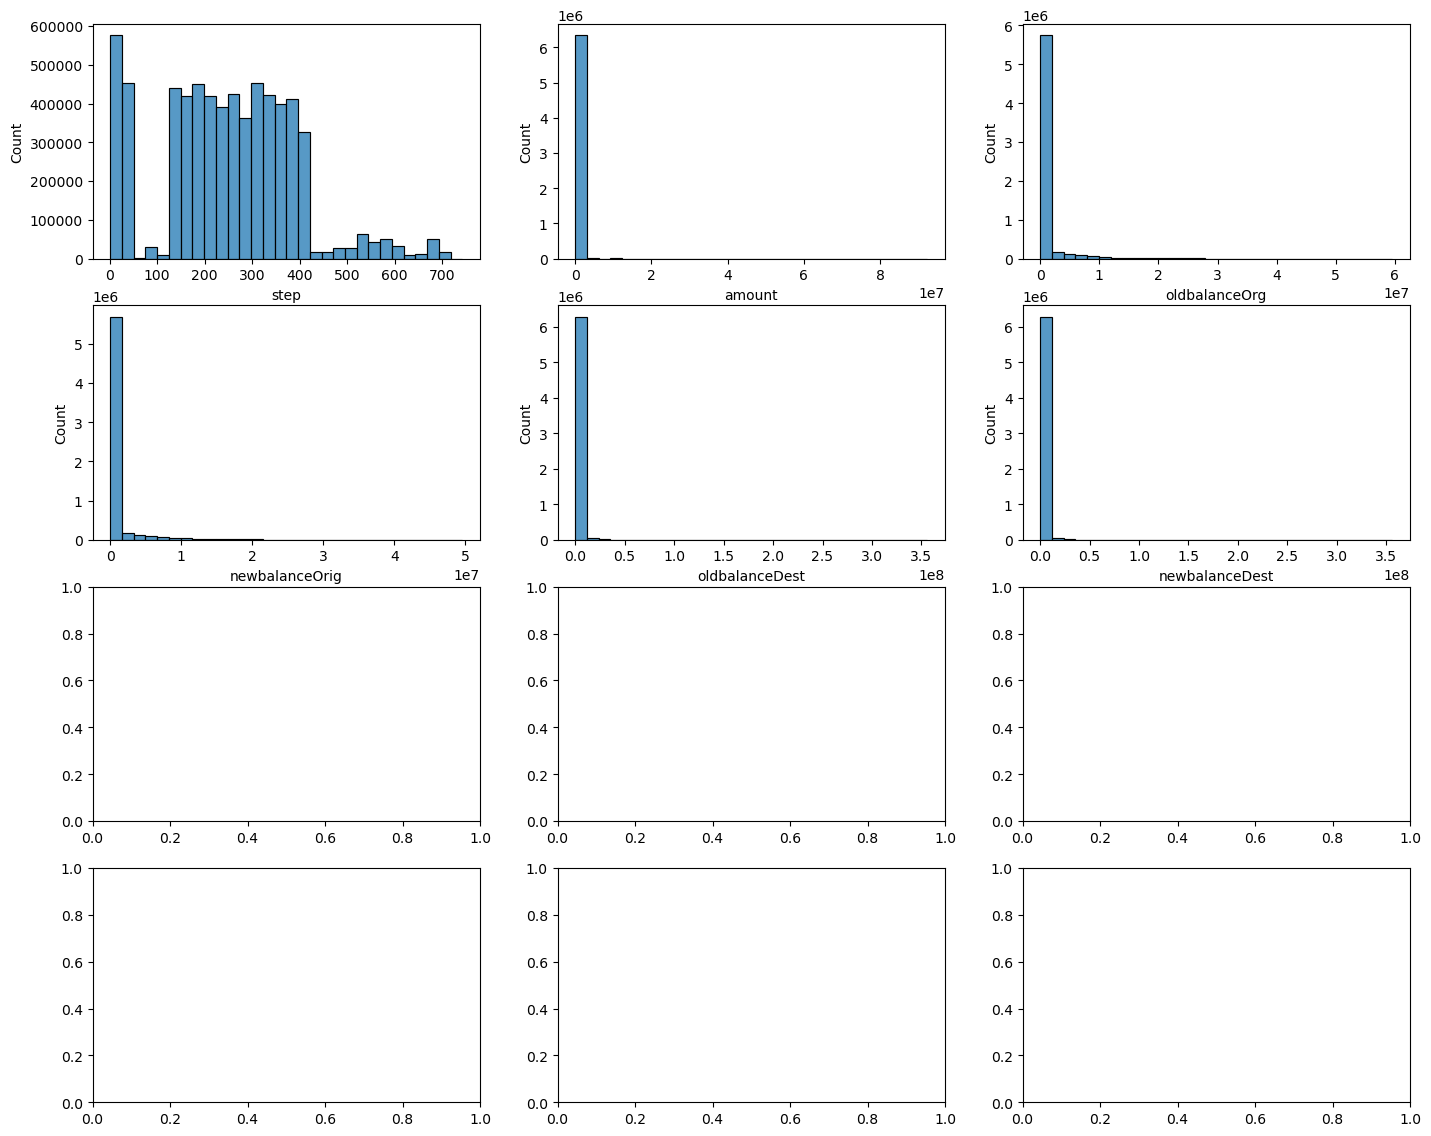

Current Timestamp:  2024-03-26 11:23:02.158596


In [56]:
# List of numerical variables to visualize
num1 = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest']

# Set up a grid of plots with 4 rows and 3 columns
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(17, 14))

# Flatten the array of axes to make it easier to iterate over
axs = axs.flatten()

# Loop through the list of variables and create a histogram for each
for i, var in enumerate(num1):
    sns.histplot(x=var, data=df, ax=axs[i], bins=30)

# Display the plots
plt.show()
print_timestamp()

step:


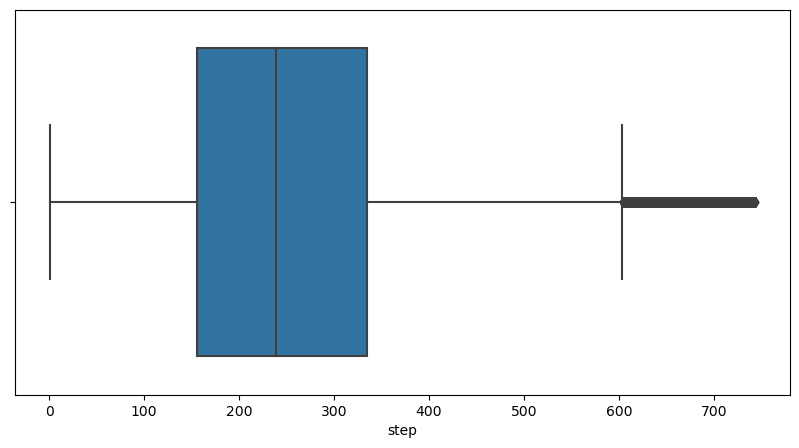

amount:


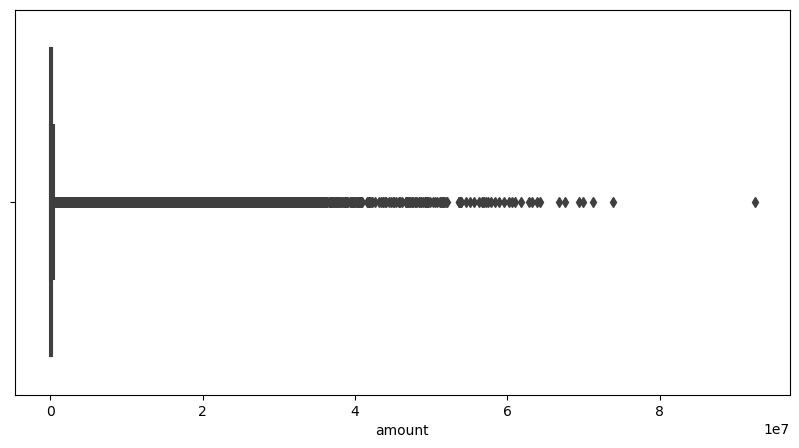

oldbalanceOrg:


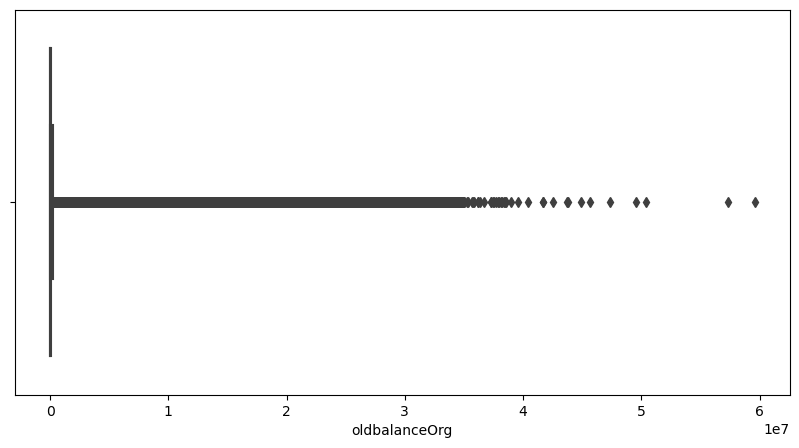

newbalanceOrig:


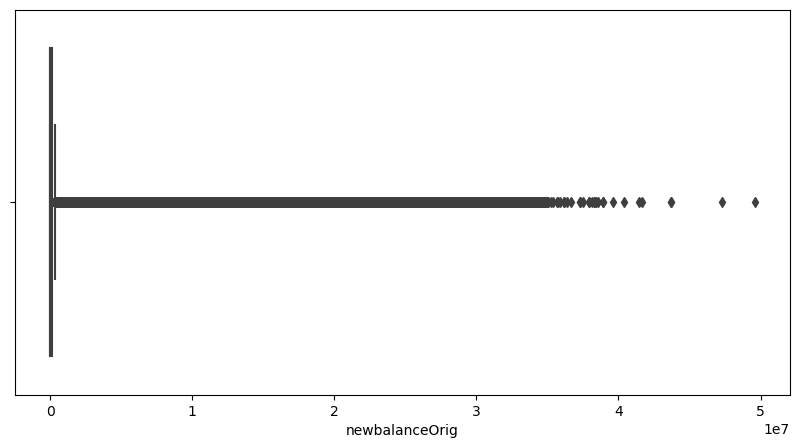

oldbalanceDest:


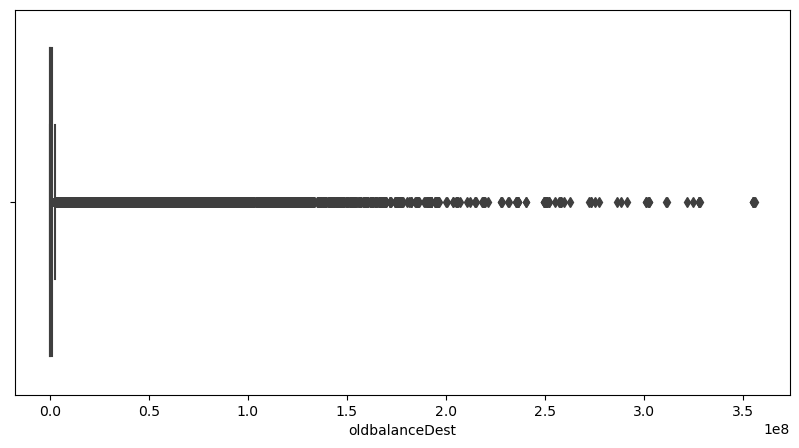

newbalanceDest:


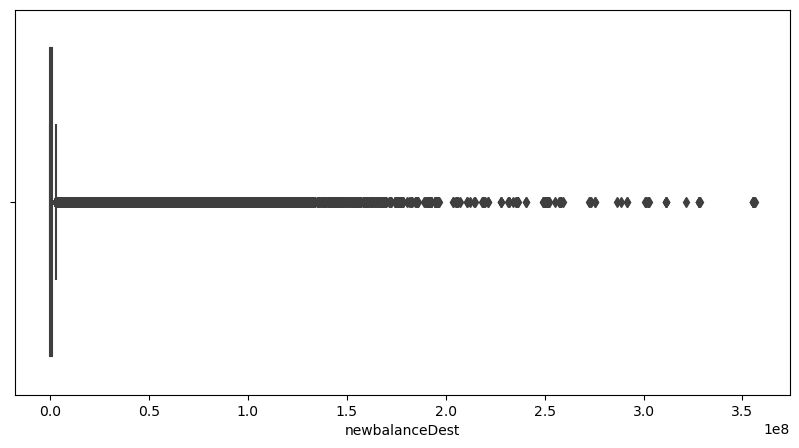

Current Timestamp:  2024-03-26 11:23:13.234742


In [57]:
#Numerical values Visulisation wtih box plot

# Numerical values visualization with box plot
for i in num1:
    plt.figure(figsize=(10,5))  # Set the figure size for each box plot
    print(i + ":")
    sns.boxplot(x=i, data=df)   # Create a box plot for the variable `i`
    plt.show()                  # Display the plot

print_timestamp()

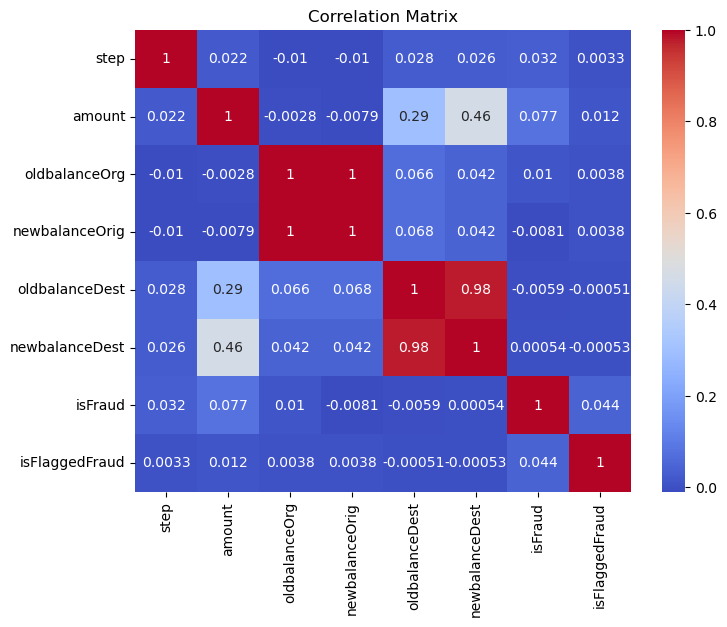

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

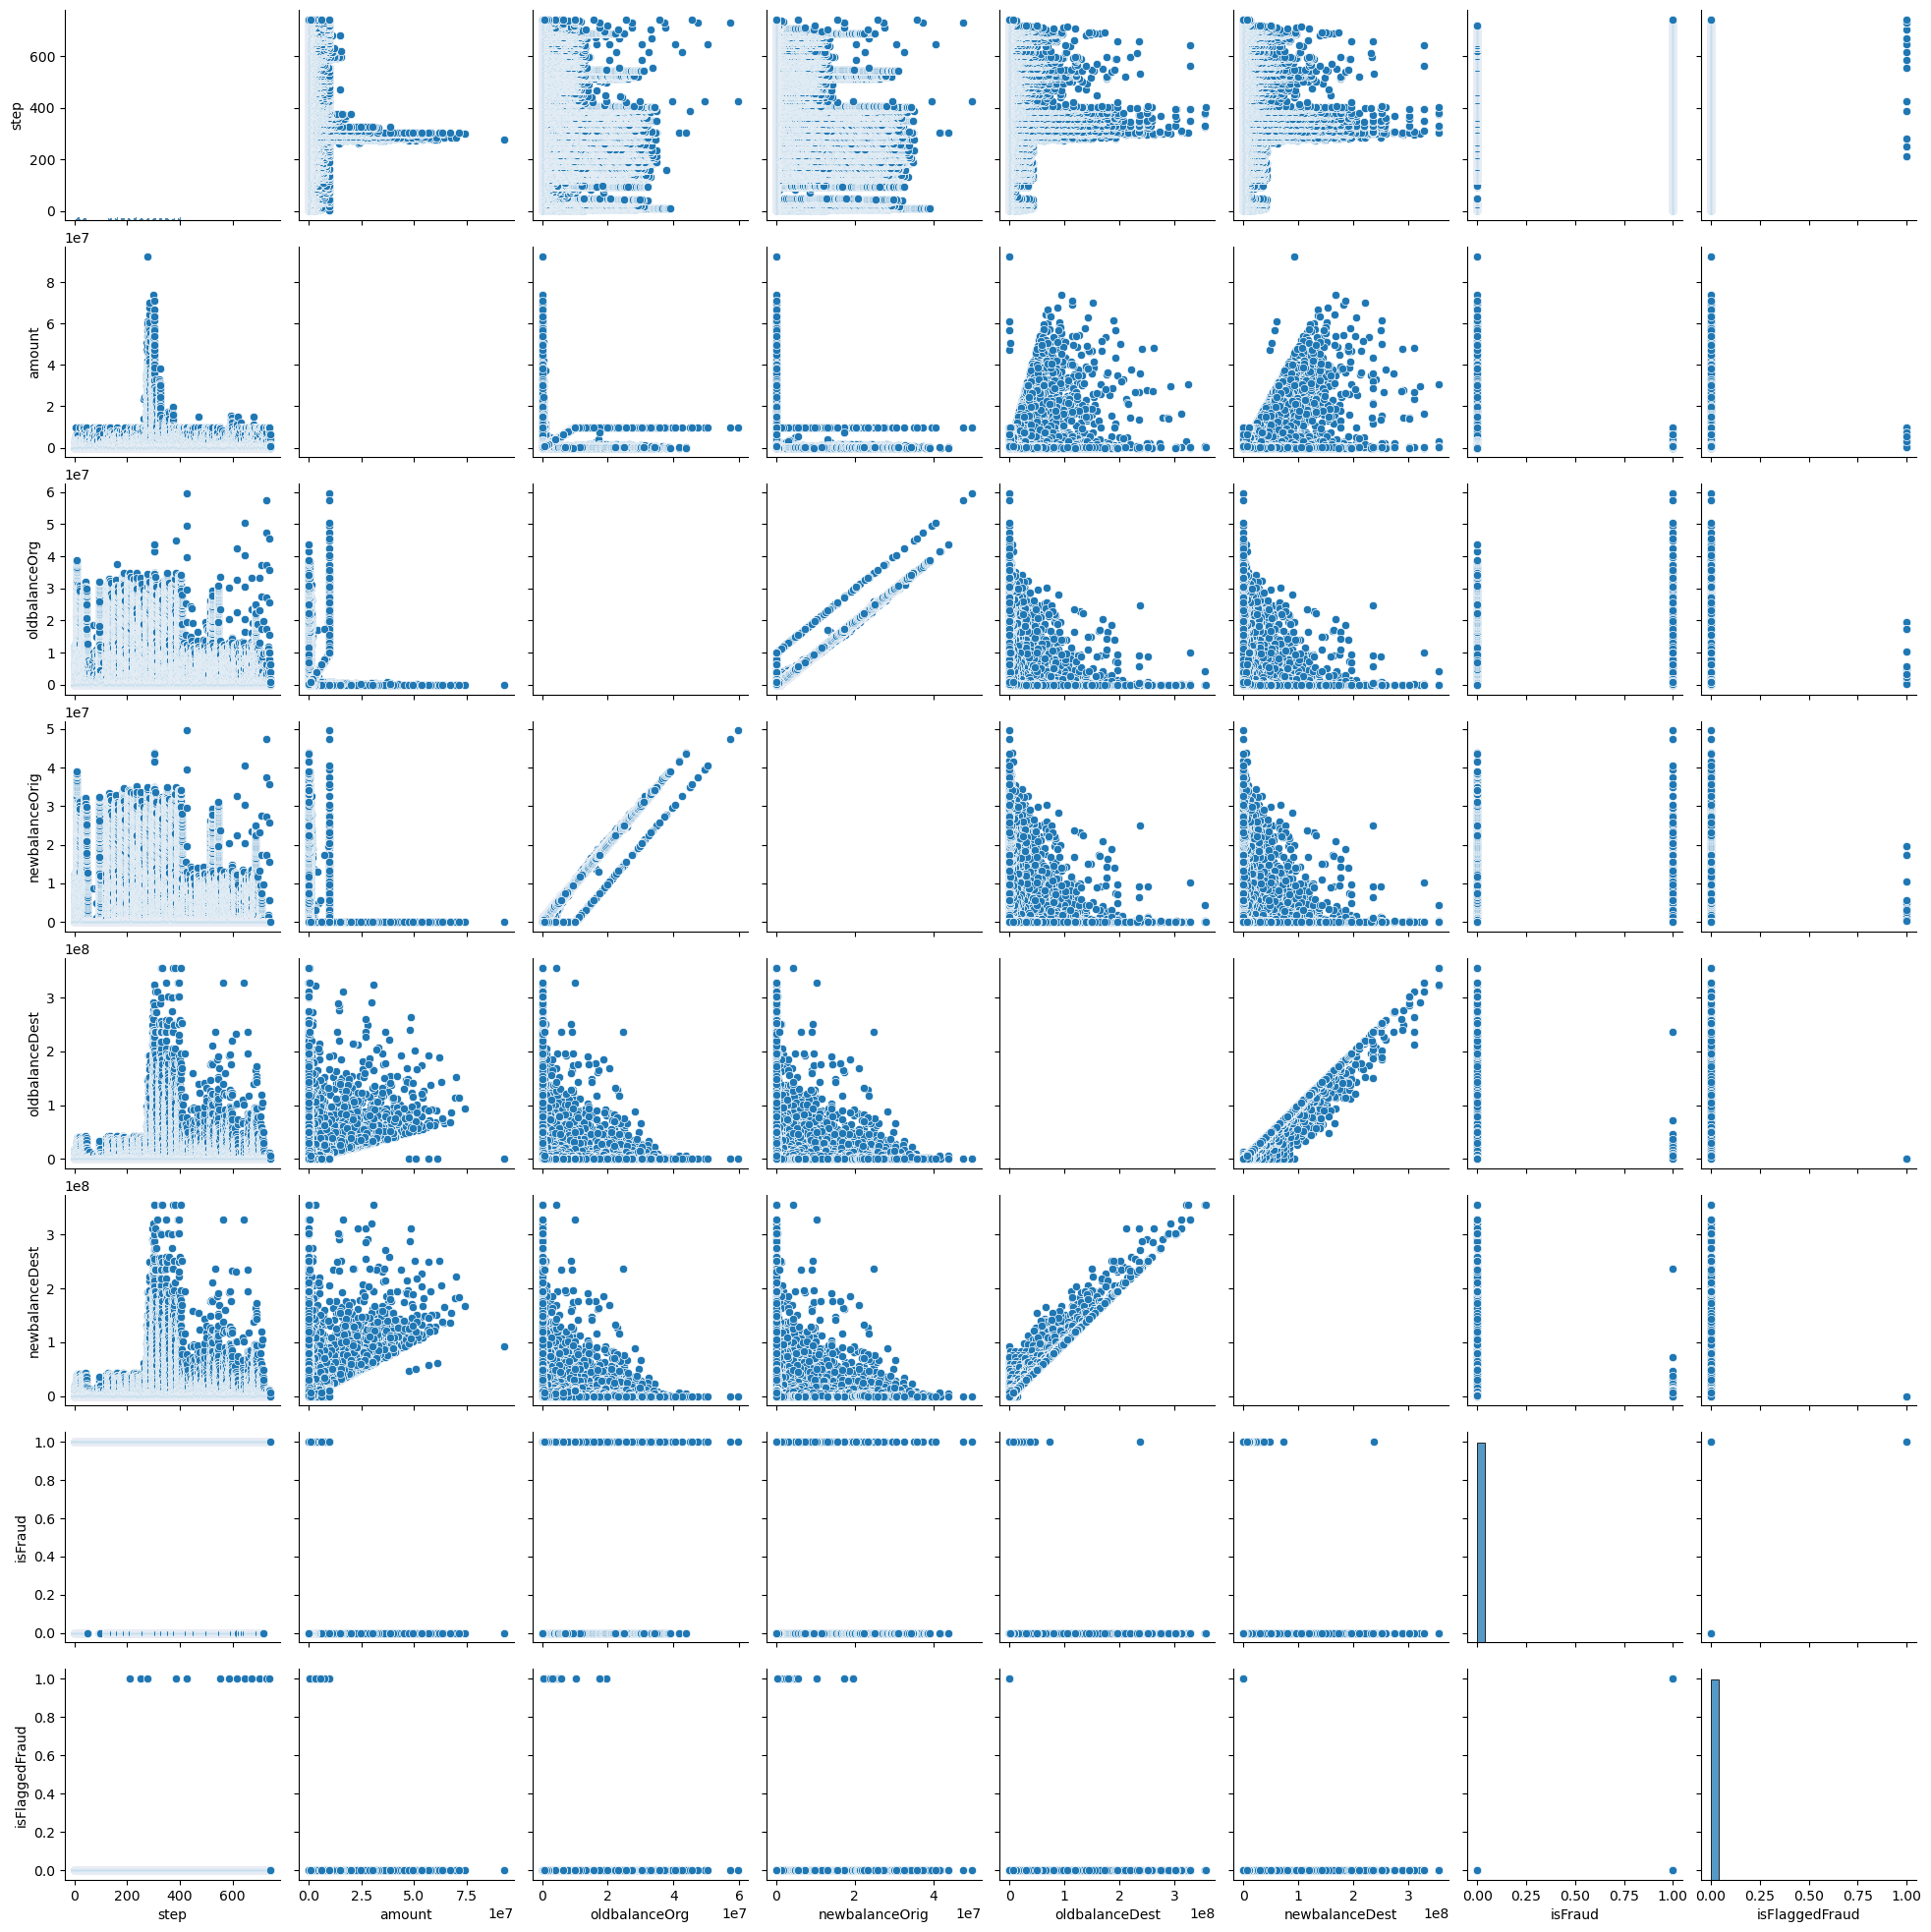

Current Timestamp:  2024-03-26 11:40:31.768100


In [58]:
# Correlation Heatmap:
# A heatmap to understand the correlation between numerical features and potentially the isFraud label.
# This will help to see if any feature strongly correlates with the occurrence of fraud.
# Calculate the correlation matrix
correlations = df.corr(numeric_only=True)

# Plotting the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()
print_timestamp()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

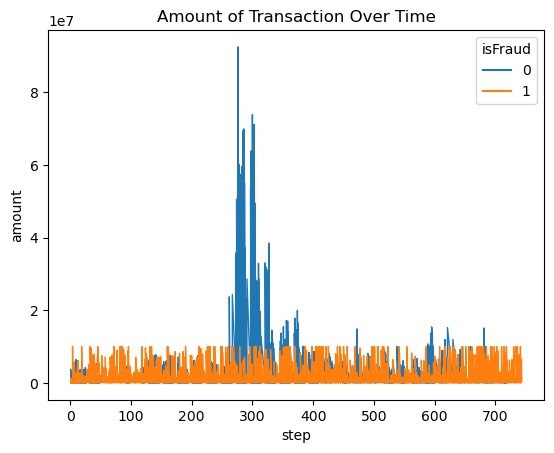

In [59]:
# Time Step Analysis:
# Plot the time step (step) against other features to understand if there's a pattern over time.
# For instance, you could plot a line or bar chart to see if fraud occurrences increase at certain time steps.

sns.lineplot(x='step', y='amount', data=df, hue='isFraud', estimator=None, lw=1)
plt.title('Amount of Transaction Over Time')
plt.show()

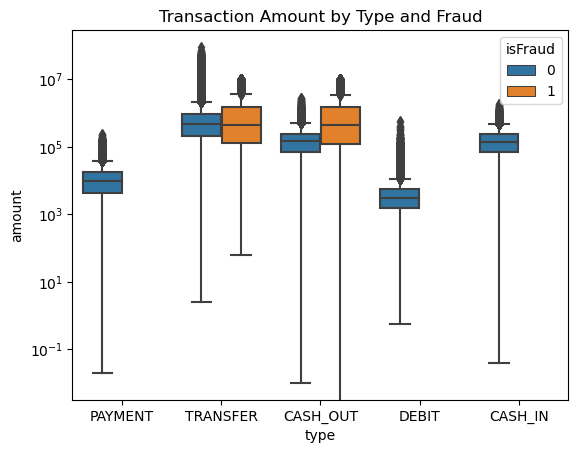

Current Timestamp:  2024-03-26 11:40:48.638823


In [60]:
# Boxplots for Transaction Amount by Type:
# Boxplots grouped by transaction type and colored by fraud to see the distribution of amounts across different types of transactions and how they relate to fraud.
sns.boxplot(x='type', y='amount', data=df, hue='isFraud')
plt.title('Transaction Amount by Type and Fraud')
plt.yscale('log')  # Use log scale due to large range of transaction amounts
plt.show()
print_timestamp()

[Back to top](#Index:) 

<a id='part4'></a>

# Part 4 - Feature Engineering and Selection

Involves creating or selecting specific features for the model based on insights from EDA, including handling categorical variables and reducing dimensionality if necessary.

In [61]:
obj1 = ['type', 'nameOrig', 'nameDest']

In [62]:
# Import the necessary libraries for hypothesis testing
from scipy.stats import chi2_contingency
import stats as stat
import colorama
from colorama import Fore

In [63]:
# Chi-square test to determine whether each categorical variable in a dataset is a good predictor of the target variable isFraud.
for i in obj1:
    print("-"*100)
    a = np.array(pd.crosstab(df['isFraud'], df[i]))         # creates a contigency table beteween each categorical variable and the target vairable
    (stats, p, dof, _) = chi2_contingency(a, correction=False)  # performs the Chi-squar test of independence
    if p >= 0.05:    #at a 95% confidence level
        print(Fore.RED + "{} is Bad predictor\n".format(i))
        print("P_value={:.2f}\n".format(p))
    else:
        print(Fore.GREEN + "{} is Good Predictor\n".format(i))
        print("P_value={:.2f}\n".format(p))
        
print_timestamp()

----------------------------------------------------------------------------------------------------
type is Good Predictor

P_value=0.00

----------------------------------------------------------------------------------------------------
nameOrig is Bad predictor

P_value=0.67

----------------------------------------------------------------------------------------------------
nameDest is Good Predictor

P_value=0.00

Current Timestamp:  2024-03-26 11:44:08.484358


In [64]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd 
from statsmodels.formula.api import ols
import statsmodels.api as smf

In [65]:
# Anova test for numerical values differ significantly across different catefories of the target variable
for i in num1:
    print("_"*100)
    print(i + ":\n")
    print("Anova:\n")
    formula = '{} ~ isFraud'.format(i)  # dynamically create the formula string
    mod = ols(formula, data=df).fit()    #  fits an Ordinary Least Squares (OLS) regression model based on the formula. The ols function comes from the statsmodels package.
    aov_table = smf.stats.anova_lm(mod, typ=2)   # performs the ANOVA test using the fitted model. The anova_lm function generates an ANOVA table. typ=2 specifies the type of sum of squares to be used in the test.
    print(aov_table, '\n')
    print('p_value={:.2f}\n'.format(aov_table['PR(>F)'][0]))
    p=aov_table['PR(>F)'][0]

    if p>0.05:  #
        print(Fore.RED + "'{}' is 'bad predictor'\n".format(i))
        print('Avg of this feature is same for both loan default and non default group\n')
        print("p_val(p) = {}\n".format(p))
    else:
        print('TUKEY:\n')
        print(Fore.GREEN +"'{}' is a 'good Predictor'\n".format(i))
        print('Avg of this feature is not same for both fraud group and non fraud group\n')
        print('We need to perform Tukey as atleast one category \n')
        print(Fore.GREEN +" '{}' is a 'good Predictor'\n".format(i))
        tukey=pairwise_tukeyhsd(df[i],df.isFraud,alpha=0.05)  # performs the Tukey HSD post-hoc test to determine which specific groups in isFraud are different in terms of the mean of variable i.
        print(tukey,'\n')
        
print_timestamp()

____________________________________________________________________________________________________
step:

Anova:

                sum_sq         df            F  PR(>F)
isFraud   1.285281e+08        1.0  6350.771614     0.0
Residual  1.287679e+11  6362618.0          NaN     NaN 

p_value=0.00

TUKEY:

'step' is a 'good Predictor'

Avg of this feature is not same for both fraud group and non fraud group

We need to perform Tukey as atleast one category 

 'step' is a 'good Predictor'



C:\Users\jdche\AppData\Local\Temp\ipykernel_6308\3873120208.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('p_value={:.2f}\n'.format(aov_table['PR(>F)'][0]))
C:\Users\jdche\AppData\Local\Temp\ipykernel_6308\3873120208.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p=aov_table['PR(>F)'][0]


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     0      1 125.1782   0.0 122.0995 128.2569   True
----------------------------------------------------- 

____________________________________________________________________________________________________
amount:

Anova:

                sum_sq         df             F  PR(>F)
isFraud   1.364475e+16        1.0  37640.657952     0.0
Residual  2.306451e+18  6362618.0           NaN     NaN 

p_value=0.00

TUKEY:

'amount' is a 'good Predictor'

Avg of this feature is not same for both fraud group and non fraud group

We need to perform Tukey as atleast one category 

 'amount' is a 'good Predictor'



C:\Users\jdche\AppData\Local\Temp\ipykernel_6308\3873120208.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('p_value={:.2f}\n'.format(aov_table['PR(>F)'][0]))
C:\Users\jdche\AppData\Local\Temp\ipykernel_6308\3873120208.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p=aov_table['PR(>F)'][0]


       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj    lower        upper     reject
-----------------------------------------------------------------
     0      1 1289770.2574   0.0 1276740.6345 1302799.8803   True
----------------------------------------------------------------- 

____________________________________________________________________________________________________
oldbalanceOrg:

Anova:

                sum_sq         df           F         PR(>F)
isFraud   5.472852e+15        1.0  656.131724  1.054289e-144
Residual  5.307115e+19  6362618.0         NaN            NaN 

p_value=0.00

TUKEY:

'oldbalanceOrg' is a 'good Predictor'

Avg of this feature is not same for both fraud group and non fraud group

We need to perform Tukey as atleast one category 

 'oldbalanceOrg' is a 'good Predictor'



C:\Users\jdche\AppData\Local\Temp\ipykernel_6308\3873120208.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('p_value={:.2f}\n'.format(aov_table['PR(>F)'][0]))
C:\Users\jdche\AppData\Local\Temp\ipykernel_6308\3873120208.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p=aov_table['PR(>F)'][0]


    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
     0      1 816838.894   0.0 754337.6039 879340.184   True
------------------------------------------------------------ 

____________________________________________________________________________________________________
newbalanceOrig:

Anova:

                sum_sq         df           F        PR(>F)
isFraud   3.611805e+15        1.0  422.458368  7.168312e-94
Residual  5.439716e+19  6362618.0         NaN           NaN 

p_value=0.00

TUKEY:

'newbalanceOrig' is a 'good Predictor'

Avg of this feature is not same for both fraud group and non fraud group

We need to perform Tukey as atleast one category 

 'newbalanceOrig' is a 'good Predictor'



C:\Users\jdche\AppData\Local\Temp\ipykernel_6308\3873120208.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('p_value={:.2f}\n'.format(aov_table['PR(>F)'][0]))
C:\Users\jdche\AppData\Local\Temp\ipykernel_6308\3873120208.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p=aov_table['PR(>F)'][0]


       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj    lower        upper     reject
-----------------------------------------------------------------
     0      1 -663577.5963   0.0 -726854.8829 -600300.3097   True
----------------------------------------------------------------- 

____________________________________________________________________________________________________
oldbalanceDest:

Anova:

                sum_sq         df           F        PR(>F)
isFraud   2.546351e+15        1.0  220.386451  7.463207e-50
Residual  7.351386e+19  6362618.0         NaN           NaN 

p_value=0.00

TUKEY:

'oldbalanceDest' is a 'good Predictor'

Avg of this feature is not same for both fraud group and non fraud group

We need to perform Tukey as atleast one category 

 'oldbalanceDest' is a 'good Predictor'



C:\Users\jdche\AppData\Local\Temp\ipykernel_6308\3873120208.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('p_value={:.2f}\n'.format(aov_table['PR(>F)'][0]))
C:\Users\jdche\AppData\Local\Temp\ipykernel_6308\3873120208.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p=aov_table['PR(>F)'][0]


       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj    lower        upper     reject
-----------------------------------------------------------------
     0      1 -557171.2555   0.0 -630731.7007 -483610.8103   True
----------------------------------------------------------------- 

____________________________________________________________________________________________________
newbalanceDest:

Anova:

                sum_sq         df         F    PR(>F)
isFraud   2.461589e+13        1.0  1.823504  0.176897
Residual  8.589039e+19  6362618.0       NaN       NaN 

p_value=0.18

'newbalanceDest' is 'bad predictor'

Avg of this feature is same for both loan default and non default group

p_val(p) = 0.17689674394097188

Current Timestamp:  2024-03-26 11:44:19.666543


C:\Users\jdche\AppData\Local\Temp\ipykernel_6308\3873120208.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('p_value={:.2f}\n'.format(aov_table['PR(>F)'][0]))
C:\Users\jdche\AppData\Local\Temp\ipykernel_6308\3873120208.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p=aov_table['PR(>F)'][0]


In [66]:
#Drop the columns based on the hypothesis testing
df1=df.drop(['nameOrig', 'nameDest', 'oldbalanceOrg'],axis=1)

In [67]:
df1.select_dtypes(include='object').columns

Index(['type'], dtype='object')

In [68]:
# Function to replace categorical values with percentages
def replace_with_percentage(column):
    counts = column.value_counts(normalize=True)
    return column.map(counts)*100

In [69]:
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = replace_with_percentage(df1[col])

Current Timestamp:  2024-03-26 11:44:22.247080


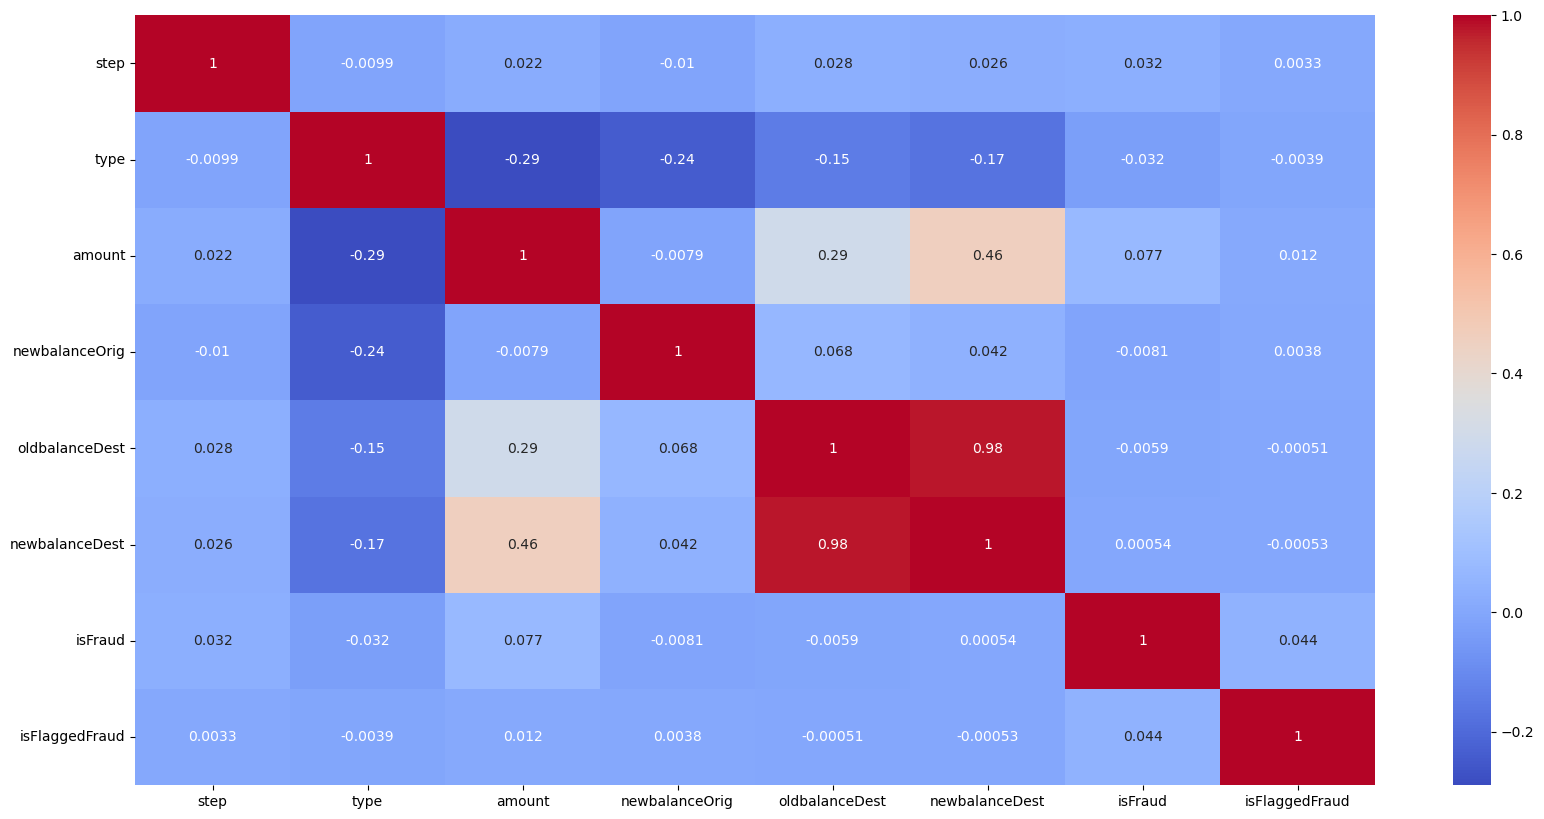

In [70]:
#Correlation matrix after converting the categorical values
plt.figure(figsize=(20,10))
sns.heatmap(data=df1.corr(),cmap='coolwarm',annot=True);

print_timestamp()

[Back to top](#Index:) 

<a id='part5'></a>

# Part 5 - Model Preparation

This section deals with preparing the data for modeling, including splitting the data into training, validation, and test sets, along with any final steps of data preparation like scaling or encoding.


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
#Split the data for train and test
X=df1.drop('isFraud',axis=1)  # Features
y=df1.isFraud                 #Target variable

In [73]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, chart_title):
    """
    Plots a confusion matrix using seaborn's heatmap.

    Parameters:
    y_true : array-like of shape (n_samples,) - True labels of the data.
    y_pred : array-like of shape (n_samples,) - Predicted labels by the classifier.

    Returns:
    None
    """
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create a figure for the plot
    plt.figure(figsize=(7,5))

    # Create a heatmap for the confusion matrix
    sns.heatmap(data=cm, annot=True, cmap="Blues", linewidths=0.5, fmt="d")

    # Label the axes
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")

    # Set the title of the plot
    plt.title(f"{chart_title} Confusion Matrix")

    # Display the plot
    plt.show()

In [74]:
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

def plot_precision_recall_curve(model, X_test, y_test, chart_title):
    """
    Plots the Precision-Recall curve and calculates the AUC for a given model and test data.

    Parameters:
    model : The trained classifier with predict_proba method available.
    X_test : The test set features.
    y_test : The true binary labels for the test set.

    Returns:
    None
    """
    # Ensure that the model has a predict_proba method
    if not hasattr(model, 'predict_proba'):
        raise AttributeError(f"The passed model doesn't support predict_proba method.")
    
    # Get the probability scores of the positive class
    y_scores = model.predict_proba(X_test)[:, 1]

    # Calculate precision and recall
    precision, recall, _ = precision_recall_curve(y_test, y_scores)

    # Calculate the average precision score
    pr_auc = average_precision_score(y_test, y_scores)

    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')

    # Labeling the plot
    plt.xlabel('Recall')
    plt.ylabel('Precision')

    plt.title(f"{chart_title} Precision-Recall Curve")
    plt.legend(loc='best')

    # Show the plot
    plt.show()

# Example usage:
# Assuming 'rfc2' is a trained RandomForestClassifier instance
# and you have 'X_test' and 'y_test' data ready
# plot_precision_recall_curve(rfc2, X_test, y_test)


In [75]:
# Split the data into training plus validation and testing sets with stratification
# This ensures that the proportion of classes in both splits will be the same as in the entire dataset

X_train_val,X_test,y_train_val,y_test=train_test_split(X, y,test_size=0.20,stratify=y, random_state=42)

# Next, split the training plus validation dataset into separate training and validation datasets
# Here, I'm using 80-20 split, but you can adjust the size according to your preference
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42)


In [76]:
# Assuming your training and testing datasets are named X_train, X_test, y_train, y_test respectively
# For the feature DataFrames
num_rows_X_train = X_train.shape[0]
num_rows_X_test = X_test.shape[0]

# For the target/label DataFrames or Series
num_rows_y_train = y_train.shape[0]
num_rows_y_test = y_test.shape[0]

print(f'Number of rows in the training features dataset: {num_rows_X_train}')
print(f'Number of rows in the testing features dataset: {num_rows_X_test}')
print(f'Number of rows in the training labels dataset: {num_rows_y_train}')
print(f'Number of rows in the testing labels dataset: {num_rows_y_test}')
print_timestamp()

Number of rows in the training features dataset: 4072076
Number of rows in the testing features dataset: 1272524
Number of rows in the training labels dataset: 4072076
Number of rows in the testing labels dataset: 1272524
Current Timestamp:  2024-03-26 11:44:30.039086


[Back to top](#Index:) 

<a id='part6'></a>

# Part 6 - Baseline Modeling and Evaluation

The initial models are built here to establish a baseline performance. It includes training simple models, evaluating their performance through metrics like accuracy, precision, recall, and plotting confusion matrices and precision-recall curves.

In [77]:
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
# Define column names
columns = ['Model', 'Accuracy (%)', 'Precision', 'Recall', 'F1-Score', 'AUC']

# Create an empty DataFrame with these columns
model_performance_df = pd.DataFrame(columns=columns)

# Display the empty DataFrame
print(model_performance_df)

## Using GridSearchCV LogisticRegression from sklearn.linear_model

Logistic regression is particularly well-suited for binary classification problems. It is a parametric method, taking in one or more predictors, and the output produced is a categorical variable within two classes, regardless of the independence among inputs. It can be applied to detect fraudulent transactions. Each transaction can be labelled as 'fraudulent' or 'not fraudulent', which suits the binary nature of logistic regression.

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define the parameter grid for LogisticRegression
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

# Initialize the model
log_reg = LogisticRegression(solver='liblinear', random_state=42)  # solver is chosen for compatibility with smaller datasets

# Fit the model
#log_reg.fit(X_train, y_train)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)


# Predictions
y_pred_log_reg_grid = grid_search.predict(X_test)

# Retrieve the best parameters
print("Best parameters found for Logistic Regression:", grid_search.best_params_)


# Basic Evaluation
accuracy = accuracy_score(y_test, y_pred_log_reg_grid)
print(f'Accuracy of Logistic Regression: {round(accuracy*100,2)}%')

# Detailed classification report
print(classification_report(y_test, y_pred_log_reg_grid))

# For AUC, ensure your model can estimate probabilities and the target variable is binary
if 'predict_proba' in dir(grid_search.best_estimator_) and len(set(y_test)) == 2:
    y_pred_prob = grid_search.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_prob)
    print(f'AUC: {auc_score:.2f}')
else:
    print("AUC can't be calculated for this setup.")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_log_reg_grid, average='weighted')
recall = recall_score(y_test, y_pred_log_reg_grid, average='weighted')
f1 = f1_score(y_test, y_pred_log_reg_grid, average='weighted')

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_prob)  # Ensure y_pred_prob is the probability of the positive class

# Append the metrics to the DataFrame
new_row = {
    'Model': 'Logistic Regression (GridSearchCV)',
    'Accuracy (%)': round(accuracy * 100, 2),
    'Precision': round(precision, 2),
    'Recall': round(recall, 2),
    'F1-Score': round(f1, 2),
    'AUC': round(auc, 2)
}

model_performance_df = model_performance_df.append(new_row, ignore_index=True)

# Display the updated DataFrame
print(model_performance_df)    

print_timestamp()

Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\jdche\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters found for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


NameError: name 'accuracy_score' is not defined

In [ ]:
plot_confusion_matrix(y_test, y_pred_log_reg, "Using GridSearchCV LogisticRegression")
print_timestamp()

In [ ]:
plot_precision_recall_curve(grid_search, X_test, y_test,"Using GridSearchCV LogisticRegression")
print_timestamp()

## Using BayesSearchCV with RandomForestClassifier

The RandomForestClassifier is an ensemble learning method that combines multiple decision trees to improve classification accuracy and prevent overfitting, making it robust against the complex and imbalanced nature of fraud detection datasets. Its ability to handle large datasets with numerous features allows for effectively capturing the nuances of fraudulent transactions. Additionally, RandomForestClassifier offers insights into feature importance, aiding in the identification of key indicators of fraud and enhancing model interpretability. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [ ]:
#using BayesSearchCV
param_space = {
    'n_estimators': (10,200),        # Number of trees in the forest
    'max_depth': (1,20),             # Maximum depth of the tree
    'min_samples_split': (2,10),      # Minimun number of samples required to split an internal code
    'min_samples_leaf': (1,10),       # Minimum number of samples required to be at a leaf node
}

bayes_search = BayesSearchCV(
    rfc,
    param_space,          
    n_iter=50,            # Number of optimisation steps
    n_jobs=-1,            # Use all available cores for parallelisation   
    cv=5,                 # Number of cross-validation folds
    random_state=42
)

bayes_search.fit(X_train,y_train)

best_params = bayes_search.best_params_
print("Best hyperparameters:",best_params)

print_timestamp()


In [ ]:
rfc_bayes=RandomForestClassifier(**best_params)
rfc_bayes.fit(X_train,y_train)

In [ ]:
# Prediction with RandomForestClassifier
y_pred=rfc_bayes.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
print(f'Model Accuracy score: {round(accuracy_score(y_pred,y_test)*100,2)}%')

print_timestamp()

In [ ]:
# Plot the confusion matrix to check the true positive and false positive visa versa for Using BayesSearchCV with RandomForestClassifier

plot_confusion_matrix(y_test, y_pred, "Using BayesSearchCV with RandomForestClassifier")
print_timestamp()


In [ ]:
print(classification_report(y_test, y_pred))
print_timestamp()

In [ ]:
plot_precision_recall_curve(rfc_bayes, X_test, y_test, "Using BayesSearchCV with RandomForestClassifier")
print_timestamp()

[Back to top](#Index:) 

<a id='part7'></a>

## Part 7 - Advanced Modeling and Hyperparameter Tuning

Focuses on advanced modeling techniques and hyperparameter tuning using methods like GridSearchCV and BayesSearchCV to improve model performance. This section can include multiple models and their evaluations.

<span style="font-size: 40px; color: blue;"><strong>Using GridSearchCV with RandomForestClassifier</strong></span>



In [ ]:
# Define a broader parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 10, 20, 30],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'bootstrap': [True, False]
}

In [ ]:
# Fit the RandomForestClassifier with hyperparameters
#rfc2 = RandomForestClassifier(max_depth=10, n_estimators=200, random_state=0, max_features='sqrt')
#rfc2.fit(X_train, y_train)

# Initialize the RandomForestClassifier
rfc2 = RandomForestClassifier(random_state=0)   # will be renamed to rfc_grid

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rfc2, param_grid=param_grid, cv=5, n_jobs=-1, scoring='recall', verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rfc2 = grid_search.best_estimator_


In [ ]:
# Make predictions with the trained model
#pr = rfc2.predict(X_test)

# Print the model accuracy
#print(f'Model Accuracy score:{round(accuracy_score(pr, y_test) * 100, 2)}%')


# Make predictions with the trained model
pr = best_rfc2.predict(X_test)

# Print the model accuracy
print(f'Model Accuracy score: {round(accuracy_score(pr, y_test) * 100, 2)}%')

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)
print_timestamp()

In [ ]:
# Plot the confusion matrix to check the true positive and false positive visa versa for Using GridSearchCV with RandomForestClassifier

plot_confusion_matrix(y_test, pr,"Using GridSearchCV with RandomForestClassifier")
print_timestamp()

In [ ]:
print(classification_report(y_test, pr))
print_timestamp()

In [ ]:
plot_precision_recall_curve(best_rfc2, X_test, y_test,"Using GridSearchCV with RandomForestClassifier")
print_timestamp()

## Using GridSearchCV with DecisionTreeClassifier from sklearn.tree

Decision trees are a type of supervised learning algorithm that models decisions and their possible consequences, including chance event outcomes, resource costs, and utility, by splitting data into branches based on feature values. They excel in fraud detection because they can handle complex, non-linear relationships between features and outcomes, making it easier to identify fraudulent activities through clear, interpretable decision rules. Furthermore, their ability to work with both numerical and categorical data allows for comprehensive analysis of transactional data, critical for spotting unusual patterns indicative of fraud.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
param_grid = {
    "max_depth": [3, 4, 5, 6, 7, 8],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2, 3, 4],
    "random_state": [0, 42]
}

# Create a DecisionTreeClassifier with 'balanced' class weight
decision_tree = DecisionTreeClassifier(class_weight='balanced')

# Create a GridSearchCV object with the DecisionTreeClassifier
grid_search = GridSearchCV(decision_tree, param_grid, cv=5)

# Fit the GridSearchCV object with training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print(grid_search.best_params_)

In [ ]:
# Create a DecisionTreeClassifier with the best parameters found
d_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, random_state=0)

# Fit the DecisionTreeClassifier with training data
d_tree.fit(X_train, y_train)

In [ ]:
# Make predictions with the trained Decision Tree model
pred = d_tree.predict(X_test)

# Print the model accuracy
print(f'Model Accuracy score:{round(accuracy_score(pred, y_test) * 100, 2)}%')

print_timestamp()

In [ ]:
plot_confusion_matrix(y_test, pred,"DecisionTreeClassifier")
print_timestamp()

In [ ]:
print(classification_report(y_test, pred))

print_timestamp()

In [ ]:
plot_precision_recall_curve(d_tree, X_test, y_test,"DecisionTreeClassifier")

print_timestamp()

In [ ]:
# Lets plot the ROC curve bases on the predicted results for Using GridSearchCV with RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score


# Predict the probabilities for the positive class
y_pred_prob = rfc2.predict_proba(X_test)[:,1]

# Create a dataframe with actual and predicted probabilities
df_actual_predicted = pd.concat([
    pd.DataFrame(np.array(y_test), columns=['y_actual']),
    pd.DataFrame(y_pred_prob, columns=['y_pred_prob'])
], axis=1)

# Set the index of the dataframe to be the same as y_test's index
df_actual_predicted.index = y_test.index

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_prob'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_prob'])

# Plot the ROC curve
plt.plot(fpr, tpr, label='AUC = %.4f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='k')  # plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', fontsize=18)
plt.legend()
plt.show()

print_timestamp()

In [ ]:

# Check the features importance using rfc
imp_fea = pd.DataFrame({'Feature_name': X_train.columns, 'importance': rfc2.feature_importances_})
imp_fea = imp_fea.sort_values(by='importance', ascending=False)


In [ ]:
# Plot the features importance matrix
fe1 = imp_fea.head(10)
plt.figure(figsize=(15,10))
sns.barplot(data=fe1, x="importance", y="Feature_name")
plt.title("Features Importance Matrix", fontsize=18)
plt.show()

print_timestamp()


## Model stacking and boosting

Model stacking combines multiple classification via a meta-learner, enhancing predictive performance by leveraging the strengths of each base model. It is particularly effective in complex scenarios like fraud detection, where diverse patterns may be captured better through a combination of different algorithms rather than relying on a single model approach. Stacking helps in reducing bias and variance, leading to more accurate and robust predictions, making it a powerful tool for identifying fraudulent activities with higher precision.

In [ ]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier

# Define class weights for cost-sensitive learning
# Increase the weight of class 1 if it is the minority and more important class
class_weights = {0: 1, 1: 10}  # You may need to adjust the weights depending on your specific problem

# Define base learners with the best parameters found
base_learners = [
    ('rfc_bayes', RandomForestClassifier(
        n_estimators=194, 
        max_depth=9, 
        min_samples_split=3, 
        min_samples_leaf=1, 
        class_weight=class_weights,  # Add class weights here
        random_state=0
    )),  # Parameters based on BayesSearchCV results
    ('best_rfc2', RandomForestClassifier(  # will be renamed to rfc_grid
        n_estimators=100, 
        max_depth=None, 
        min_samples_split=2, 
        min_samples_leaf=1, 
        bootstrap=False, 
        class_weight=class_weights,  # Add class weights here
        random_state=0
    ))  # Parameters based on GridSearchCV results
]

# Define the meta-learner with the best parameters found
meta_learner = LogisticRegression(
    C=1, 
    penalty='l1', 
    solver='liblinear',
    class_weight=class_weights  # Add class weights here
)

# Initialize StackingClassifier with multiple base learners and a meta learner
stacked_model = StackingClassifier(
    estimators=base_learners, 
    final_estimator=meta_learner, 
    cv=5
)

# Fit the stacked model
stacked_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = stacked_model.predict(X_test)
stacked_model_accuracy = accuracy_score(y_test, y_pred)
print(f'Stacked Model Accuracy: {round(stacked_model_accuracy*100,4)}%')

plot_confusion_matrix(y_test, y_pred,"Stacked Model")
print(classification_report(y_test, y_pred))
plot_precision_recall_curve(stacked_model, X_test, y_test,"Stacked Model")

print_timestamp()

# Save the model using joblib for persistence
dump(stacked_model, 'stacked_model.joblib')

[Back to top](#Index:) 

<a id='part8'></a>

## Part 8 - Model Comparison and Selection

After training various models, this section is dedicated to comparing their performance, selecting the best model based on evaluation metrics, and possibly combining them through techniques like stacking or boosting.

<span style="font-size: 40px; color: red;"><strong>Save the model to disk</strong></span>

In [86]:
from joblib import dump

# Save the model to disk
dump(best_rfc2, 'best_rfc2.joblib')

['best_rfc2.joblib']

In [ ]:
from joblib import load

# Load the model from disk
best_rfc2 = load('best_rfc2.joblib')
